# **BATCH NORMALIZATION**

In [1]:
import os
os.chdir("/content/drive/MyDrive/Deep_Learning/batch_normalisation")
os.getcwd()

'/content/drive/MyDrive/Deep_Learning/batch_normalisation'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import time

In [3]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

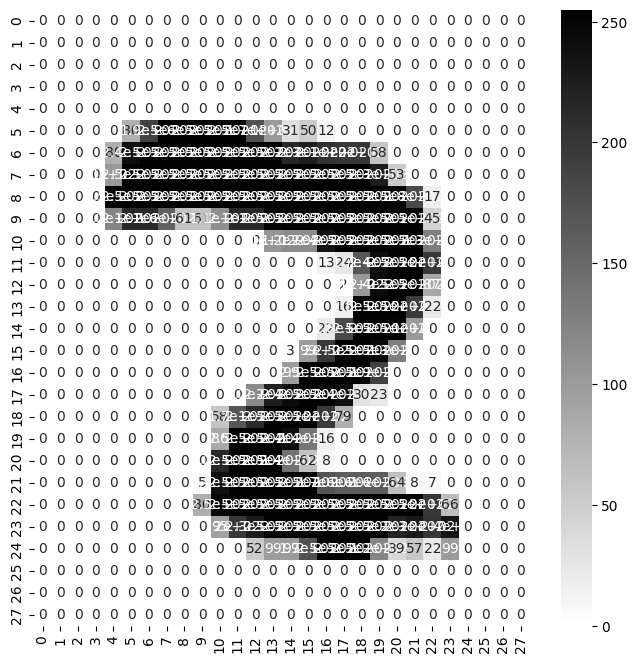

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(X_train_full[28], cmap='binary', annot=True)
plt.show()

In [11]:
X_valid, X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255.

In [13]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10, activation="softmax"),
]

model = Sequential(layers=LAYERS)

In [15]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), loss="sparse_categorical_crossentropy", metrics="accuracy")

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 

In [17]:
start = time.time()
model.fit(x=X_train, y=y_train, epochs=10, verbose=1, validation_data=(X_valid, y_valid))
end = time.time()

print(f"Elapsed time in training : {end-start}")

Epoch 1/10
1719/1719 [==============================] - 8s 3ms/step - loss: 1.4928 - accuracy: 0.6189 - val_loss: 0.9048 - val_accuracy: 0.8062
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7157 - accuracy: 0.8366 - val_loss: 0.5686 - val_accuracy: 0.8618
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5223 - accuracy: 0.8675 - val_loss: 0.4569 - val_accuracy: 0.8856
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4449 - accuracy: 0.8809 - val_loss: 0.4001 - val_accuracy: 0.8956
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4026 - accuracy: 0.8900 - val_loss: 0.3665 - val_accuracy: 0.9038
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3749 - accuracy: 0.8959 - val_loss: 0.3433 - val_accuracy: 0.9070
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3551 - accuracy: 0.9002 - val_loss: 0.3261 - val_accuracy:

# After batch normalization

In [18]:
del(model)

In [19]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28]), # after input layer we need to add batch normalization layer
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(), # then after the activation function layer
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),  # same here too
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax"),
]

model = Sequential(layers=LAYERS)

In [20]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3), loss="sparse_categorical_crossentropy", metrics="accuracy")

In [21]:
start = time.time()
model.fit(x=X_train, y=y_train, epochs=10, verbose=1, validation_data=(X_valid, y_valid))
end = time.time()

print(f"Elapsed time in training : {end-start}")

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.8555 - accuracy: 0.7409 - val_loss: 0.4905 - val_accuracy: 0.8614
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4783 - accuracy: 0.8609 - val_loss: 0.3835 - val_accuracy: 0.8886
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4095 - accuracy: 0.8818 - val_loss: 0.3377 - val_accuracy: 0.9002
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3681 - accuracy: 0.8924 - val_loss: 0.3089 - val_accuracy: 0.9086
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3421 - accuracy: 0.9009 - val_loss: 0.2879 - val_accuracy: 0.9156
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3257 - accuracy: 0.9052 - val_loss: 0.2735 - val_accuracy: 0.9220
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3089 - accuracy: 0.9100 - val_loss: 0.2632 - val_accuracy

You can compare the above training and the previous training and we can see that using batch normalization we can easily get higher accuracy in less number of epochs

In [23]:
np.argmax(model.predict(X_test, verbose=1))

313/313 [==============================] - 1s 2ms/step


39861